In [1]:
import sys
from utils import print_json
from utils.cloudant_utils import cloudant_db as db, save_doc
from datetime import date
import numpy as np
import pandas as pd

SUCCESS connecting to Cloudant db github-public-ai-2022


In [2]:
fields = ["_id", "releases", "stars", "watchers", "commits", "forks", "issues"]
repos = [r for r in db.get_query_result({"type": "release"}, ["_id", "releases"], 
                                        limit=10000, raw_result=True)["docs"]]
print(repos[0]['releases'][0].keys())
values = [r for release in repos for r in release["releases"]]
df = pd.DataFrame(values)

dict_keys(['repo', 'release_tag', 'release_date', 'downloads', 'stars', 'watchers', 'forks', 'commits', 'issues', 'total_stars', 'total_forks', 'total_commits', 'total_issues', 'total_closedIssues', 'closedIssues', 'readme', 'readme_size'])


In [3]:
 df.shape

(44015, 18)

In [88]:
# df[df["repo"]=="obss/sahi"]

In [89]:
# df[df['total_stars']>500]

In [4]:
new_df = df[['repo', 'release_tag', 'release_date', 'downloads', 'total_stars', 'total_forks', 'total_commits', 
             'total_issues', 'total_closedIssues', 'readme', 'readme_size']].copy()

In [5]:
new_df.nlargest(n=5, columns=['total_stars'])

,repo,release_tag,release_date,downloads,total_stars,total_forks,total_commits,total_issues,total_closedIssues,readme,readme_size
35185,opencv/opencv,4.5.5,2021-12-25T11:50:04Z,14662,59716,50204,28946,8663,0,## OpenCV: Open Source Computer Vision Library...,844
35184,opencv/opencv,4.5.4,2021-10-10T00:52:59Z,20603,57452,48709,28706,8663,0,## OpenCV: Open Source Computer Vision Library...,847
35182,opencv/opencv,4.5.3,2021-07-05T23:40:18Z,30650,55603,47049,28321,8663,0,## OpenCV: Open Source Computer Vision Library...,847
35183,opencv/opencv,3.4.16,2021-10-10T00:45:11Z,2997,55603,47049,28321,8663,0,## OpenCV: Open Source Computer Vision Library...,720
26466,keras-team/keras,v2.8.0,2022-02-03T05:13:44Z,0,53970,18997,6476,11082,0,# Keras: Deep Learning for humans\n\n![Keras l...,8296


In [6]:
corrrelation= new_df.corr(method="pearson")
print("Pearson correlation coefficient:")
print(corrrelation)

Pearson correlation coefficient:
                    downloads  total_stars  total_forks  total_commits  \
downloads            1.000000     0.012452     0.012275       0.006136   
total_stars          0.012452     1.000000     0.837765       0.345143   
total_forks          0.012275     0.837765     1.000000       0.345786   
total_commits        0.006136     0.345143     0.345786       1.000000   
total_issues         0.022528     0.765488     0.653569       0.413976   
total_closedIssues  -0.004552    -0.031945    -0.027234      -0.012497   
readme_size         -0.006688     0.030087    -0.007988      -0.010572   

                    total_issues  total_closedIssues  readme_size  
downloads               0.022528           -0.004552    -0.006688  
total_stars             0.765488           -0.031945     0.030087  
total_forks             0.653569           -0.027234    -0.007988  
total_commits           0.413976           -0.012497    -0.010572  
total_issues            1.000000  

In [93]:
# new_df[new_df['downloads'] > 200]

# REPO basis Analysis

In [8]:
repo_df = df.groupby('repo').agg(
        forks=pd.NamedAgg(column="forks", aggfunc="sum"),
        downloads=pd.NamedAgg(column="downloads", aggfunc="sum"),
        stars=pd.NamedAgg(column="stars", aggfunc="sum"),
        release_counts=pd.NamedAgg(column="release_tag", aggfunc="count"),
        commits=pd.NamedAgg(column="commits", aggfunc="sum"),
        issues=pd.NamedAgg(column="issues", aggfunc="sum"),
        closedIssues=pd.NamedAgg(column="closedIssues", aggfunc="sum")
    )

In [9]:
repo_df

,forks,downloads,stars,release_counts,commits,issues,closedIssues
repo,,,,,,,
0xangelo/raylab,6,0,46,1,1183,1,1
100/Solid,9,0,60,2,0,1,0
10up/classifai,34,0,219,11,0,65,52
1adrianb/face-alignment,443,0,2225,10,2,0,0
1adrianb/pytorch-estimate-flops,0,0,123,8,0,6,5
...,...,...,...,...,...,...,...
zycv/Speaker-Recognition-Based-on-Deep-Learning-An-Overview,1,53,11,2,0,0,0
zyddnys/manga-image-translator,47,1782,207,4,2,32,22
zyfra/ebonite,9,0,66,16,1,4,1


In [10]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8


In [11]:
repo_df.shape

(4989, 7)

In [12]:
repo_df[repo_df.downloads == 0].shape

(3632, 7)

In [13]:
has_download_repos = repo_df[repo_df.downloads > 0]

In [14]:
has_download_repos

,forks,downloads,stars,release_counts,commits,issues,closedIssues
repo,,,,,,,
2Bear/othello-zero,3,80,6,2,4,3,1
404notf0und/FXY,0,17,27,1,2,0,0
42-AI/bootcamp_machine-learning,24,26,87,9,146,79,59
42-AI/bootcamp_python,0,26,149,3,0,73,34
4paradigm/OpenMLDB,0,2941,1146,13,0,0,0
...,...,...,...,...,...,...,...
zipzou/captcha-recognition,0,44,52,1,0,5,3
znck/annotate,0,195,3,4,0,0,0
zycv/Speaker-Recognition-Based-on-Deep-Learning-An-Overview,1,53,11,2,0,0,0


Text(0.5, 0, 'donwloads')

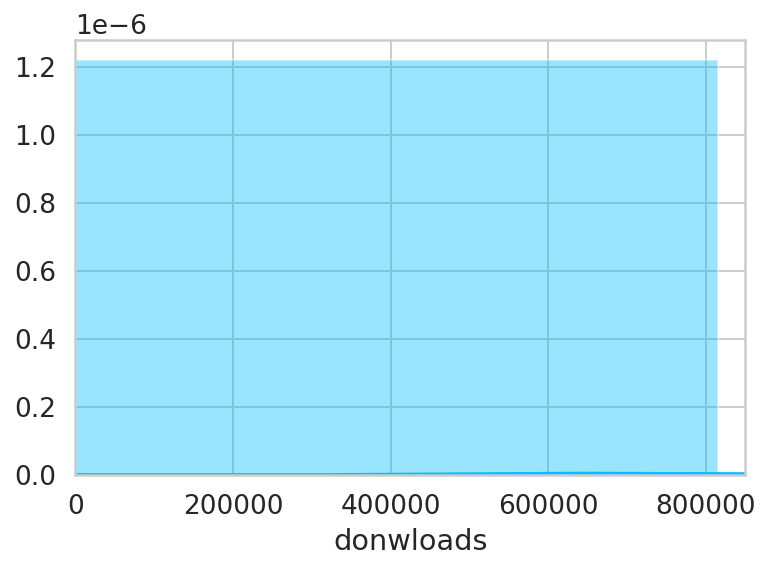

In [15]:
sns.distplot(has_download_repos['downloads'])
# sns.distplot(has_download_repos['downloads'], kde=False, norm_hist=True, bins=int(50))


plt.xlim([0, 850000])
plt.xlabel('donwloads')

In [16]:
has_download_repos['1kdownloads']= np.where(has_download_repos['downloads'] > 10000, 1, 0)

/users/kent/jmaharja/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
has_download_repos['1kdownloads'].value_counts()

0    1242
1     115
Name: 1kdownloads, dtype: int64

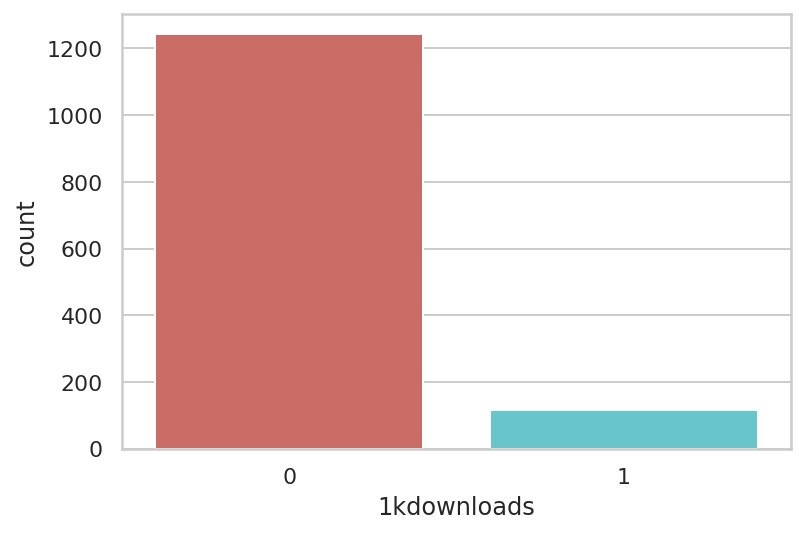

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='1kdownloads',data=has_download_repos, palette='hls')
plt.show()
plt.savefig('count_plot')

In [105]:
# has_download_repos.nlargest(n=10, columns=['downloads'])

In [106]:
# has_download_repos.nsmallest(n=10, columns=['stars'])

In [107]:
# has_download_repos.sort_values(by=['release_counts'], ascending=False)

In [19]:
corrrelation= has_download_repos.corr(method="pearson")
print("Pearson correlation coefficient:")
print(corrrelation)

Pearson correlation coefficient:
                   forks  downloads     stars  release_counts   commits  \
forks           1.000000   0.125994  0.765511        0.066667  0.423531   
downloads       0.125994   1.000000  0.145639        0.475052  0.005366   
stars           0.765511   0.145639  1.000000        0.120869  0.163996   
release_counts  0.066667   0.475052  0.120869        1.000000  0.062938   
commits         0.423531   0.005366  0.163996        0.062938  1.000000   
issues          0.004423  -0.010710  0.066207        0.041450  0.423383   
closedIssues    0.002825  -0.009533  0.051588        0.039351  0.436777   
1kdownloads     0.241135   0.148147  0.348991        0.233313 -0.005727   

                  issues  closedIssues  1kdownloads  
forks           0.004423      0.002825     0.241135  
downloads      -0.010710     -0.009533     0.148147  
stars           0.066207      0.051588     0.348991  
release_counts  0.041450      0.039351     0.233313  
commits         0.423

In [20]:
has_download_repos.groupby('1kdownloads').mean()

,forks,downloads,stars,release_counts,commits,issues,closedIssues
1kdownloads,,,,,,,
0,45.717391,761.922705,256.828502,8.786634,47.304348,10.011272,7.285024
1,655.800000,629926.504348,2280.678261,34.530435,43.226087,11.643478,7.226087


# Logistic Regression

In [21]:
cols=['forks', 'downloads', 'stars', 'release_counts', 'commits', 'issues', 'closedIssues'] 
X=has_download_repos[cols]
y=has_download_repos['1kdownloads']

In [22]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.352593
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:            1kdownloads   No. Observations:                 1357
Model:                          Logit   Df Residuals:                     1350
Method:                           MLE   Df Model:                            6
Date:                Wed, 01 Jun 2022   Pseudo R-squ.:                 -0.2150
Time:                        21:55:57   Log-Likelihood:                -478.47
converged:                       True   LL-Null:                       -393.81
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
forks              0.0001      0.002      0.074      0.941      -0.003       0.003
downloads       

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred = logreg.predict(X_test)

In [25]:
X_test.shape

(408, 7)

In [26]:
y_test.value_counts()

0    375
1     33
Name: 1kdownloads, dtype: int64

In [27]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96



# Validation

In [28]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.961


/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/users/kent/jmaharja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[360  15]
 [  2  31]]


In [119]:
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       375
           1       0.67      0.94      0.78        33

    accuracy                           0.96       408
   macro avg       0.83      0.95      0.88       408
weighted avg       0.97      0.96      0.96       408



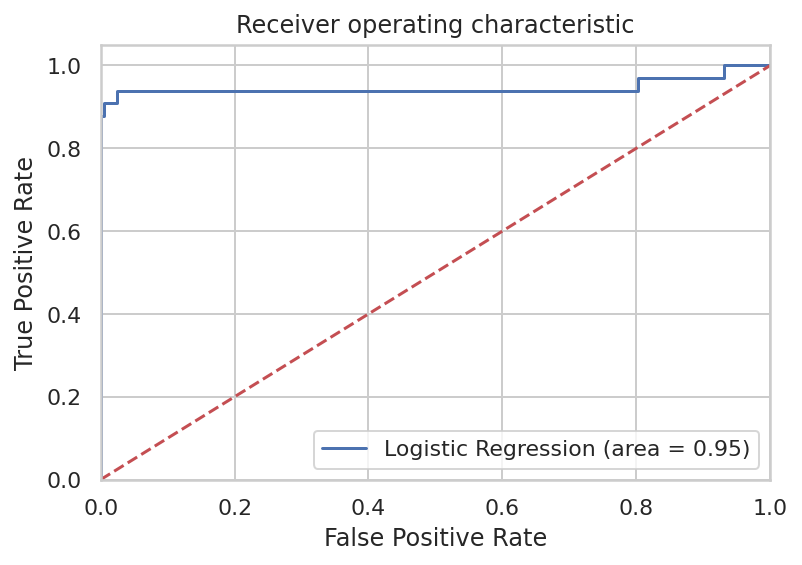

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# SHAP Analysis

In [32]:
import shap

In [33]:
# Fits the explainer
explainer = shap.Explainer(logreg.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

In [34]:
# # Evaluate SHAP values
# shap_values = explainer.shap_values(X)

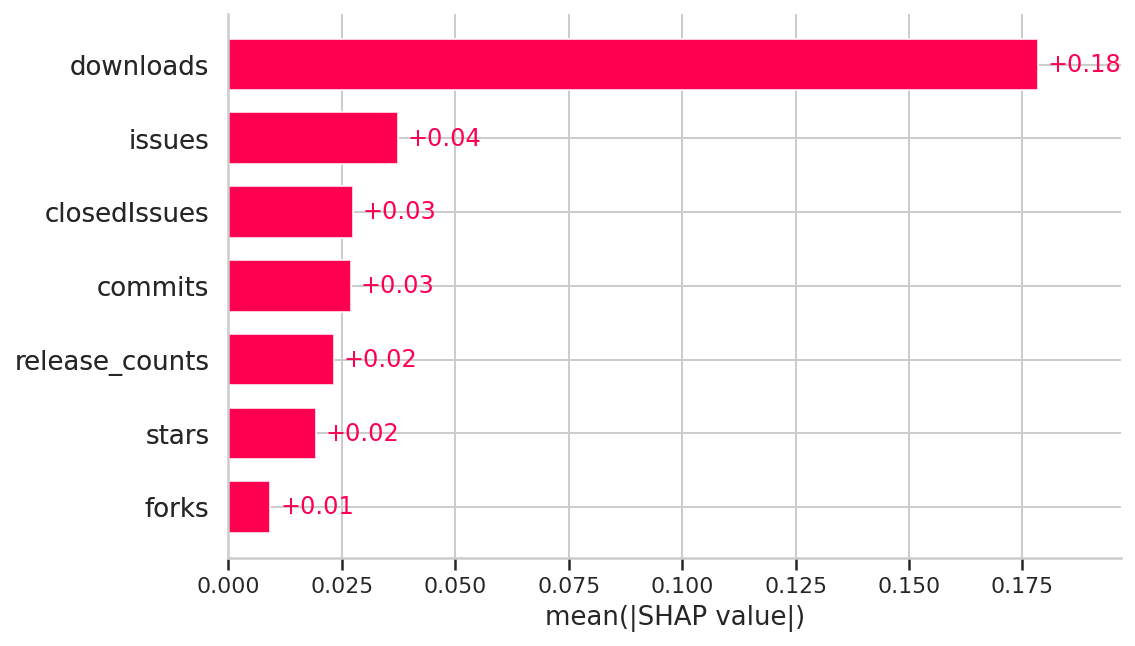

In [35]:
shap.plots.bar(shap_values)


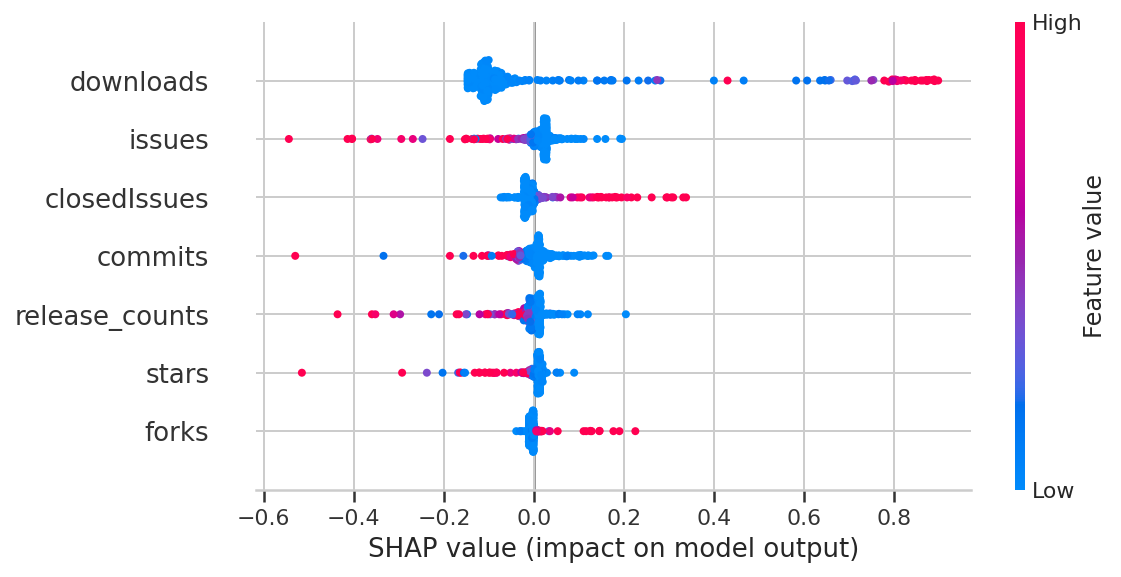

In [36]:
# shap.summary_plot(shap_values)
# or 
shap.plots.beeswarm(shap_values)

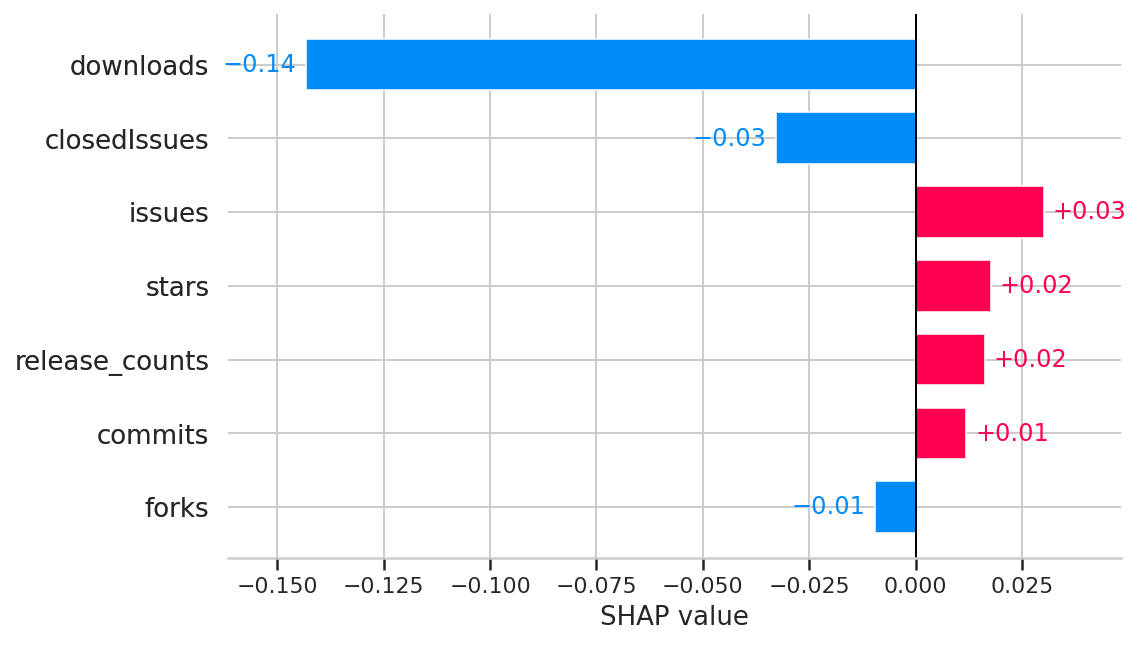

In [37]:
shap.plots.bar(shap_values[0])


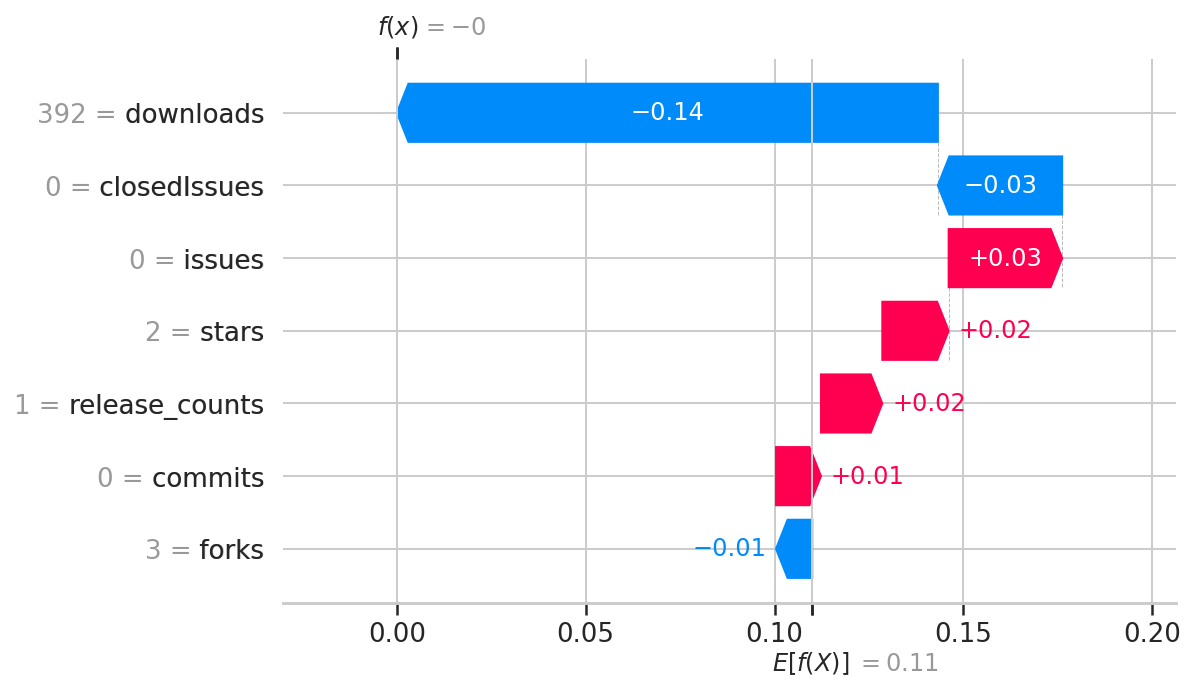

In [38]:
shap.plots.waterfall(shap_values[0])


In [129]:
# shap.plots.force(shap_test[0])


# XGBoost with Skikit-Learn

In [130]:
import xgboost as xgb
cols=['forks', 'stars', 'release_counts', 'commits', 'issues', 'closedIssues'] 
X=has_download_repos[cols]
y=has_download_repos['200downloads']

KeyError: '200downloads'

In [ ]:
# xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
# xgb_model.fit(X, y)

# y_pred = xgb_model.predict(X)

# print(confusion_matrix(y, y_pred))

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

xgb.plot_importance(xgb_model)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

In [ ]:

from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_model, num_trees=0, rankdir='LR')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))

plot_tree(xgb_model, num_trees=4, ax=ax)

plt.show()
plt.savefig("tree.pdf")

